In [3]:
import torch

def eeg_to_hankel_torch(x, factor=1):
    """
    PyTorch 版本的 Hankel 化 (支持 Autograd)。
    Input: (Batch, Channel, Time) or (Channel, Time)
    """
    is_batched = x.ndim == 3
    if not is_batched:
        x = x.unsqueeze(0) # (1, C, T)

    B, C, T = x.shape

    window_size = T // 2 // factor + 1

    L = window_size
    K = T - L + 1

    # Unfold 在最后一个维度上操作
    # x.unfold(dimension, size, step)
    # Output: (B, C, K, L) -> 这里 K 是 windows 数量, L 是 window size
    windows = x.unfold(-1, window_size, 1)

    # Permute 到 (B, C, L, K)
    H = windows.permute(0, 1, 3, 2)

    if not is_batched:
        H = H.squeeze(0)

    return H

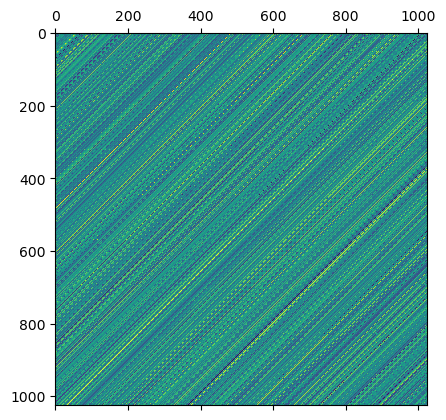

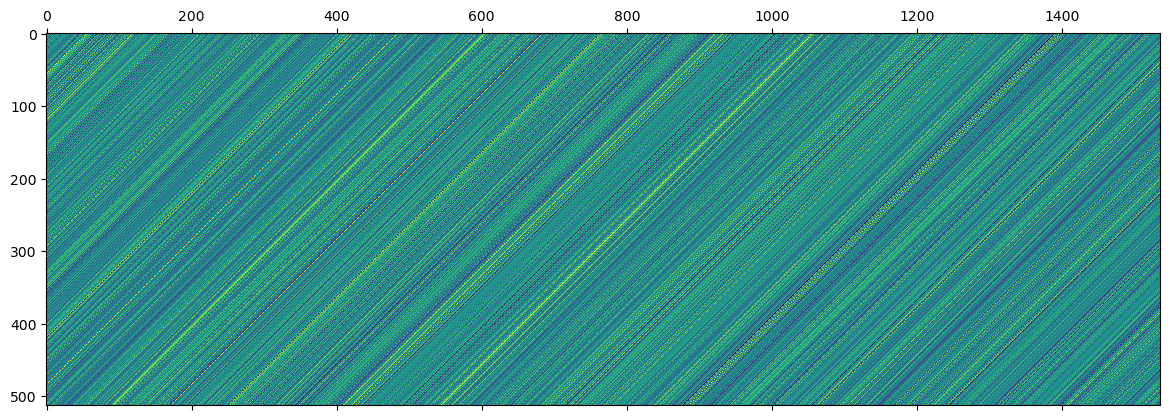

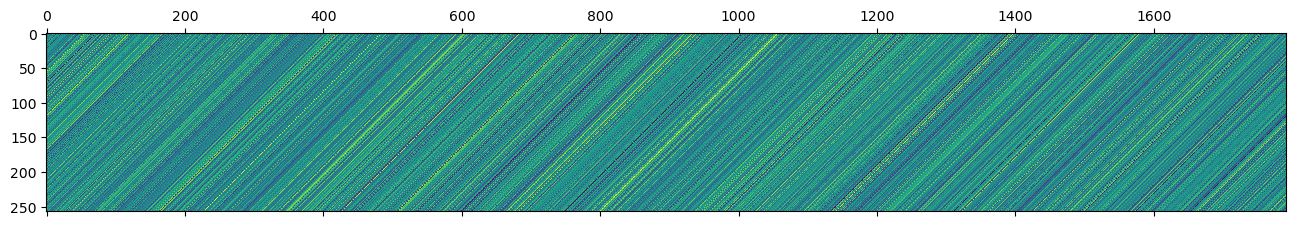

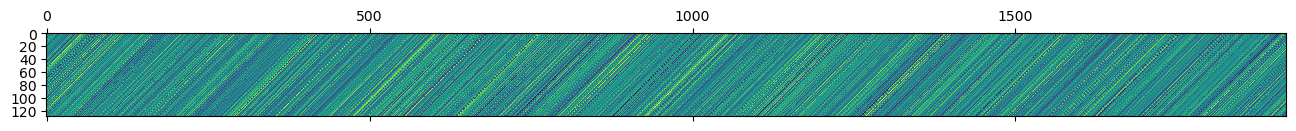

In [4]:
import matplotlib.pyplot as plt

eeg = torch.randn(64, 2048)  # (Channel, Time)

eeg_hankel_1 = eeg_to_hankel_torch(eeg, 1)

eeg_hankel_2 = eeg_to_hankel_torch(eeg, 2)

eeg_hankel_4 = eeg_to_hankel_torch(eeg, 4)

eeg_hankel_8 = eeg_to_hankel_torch(eeg, 8)

plt.matshow(eeg_hankel_1[0])
plt.show()

plt.matshow(eeg_hankel_2[0])
plt.show()

plt.matshow(eeg_hankel_4[0])
plt.show()

plt.matshow(eeg_hankel_8[0])
plt.show()